In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle

In [2]:
df = pd.read_csv('data/air_pollution_2024_with_prep.csv')
df

,pm25,pm10,o3,co,no2,so2
0,35.0,64.0,9.0,0.520,32.0,3.0
1,28.0,64.0,12.0,0.525,28.5,3.0
2,28.0,56.0,14.0,0.530,25.0,3.0
3,27.0,48.0,16.0,0.560,18.0,2.0
4,32.0,47.0,17.0,0.610,15.0,2.0
...,...,...,...,...,...,...
104225,11.0,23.0,24.0,0.210,2.0,1.0
104226,12.0,24.0,23.0,0.200,1.0,1.0
104227,14.0,25.0,22.0,0.200,2.0,1.0
104228,15.0,29.0,20.0,0.200,2.0,1.0


# แยก Feature และ Target

In [3]:
X = df.drop(columns='pm25')
X

,pm10,o3,co,no2,so2
0,64.0,9.0,0.520,32.0,3.0
1,64.0,12.0,0.525,28.5,3.0
2,56.0,14.0,0.530,25.0,3.0
3,48.0,16.0,0.560,18.0,2.0
4,47.0,17.0,0.610,15.0,2.0
...,...,...,...,...,...
104225,23.0,24.0,0.210,2.0,1.0
104226,24.0,23.0,0.200,1.0,1.0
104227,25.0,22.0,0.200,2.0,1.0
104228,29.0,20.0,0.200,2.0,1.0


In [4]:
y = df['pm25']
y

0         35.0
1         28.0
2         28.0
3         27.0
4         32.0
          ... 
104225    11.0
104226    12.0
104227    14.0
104228    15.0
104229    15.0
Name: pm25, Length: 104230, dtype: float64

# Feature Scaling
- การทำงานของ Min-Max Scaling คือการแปลงค่าของแต่ละคุณสมบัติในชุดข้อมูลให้อยู่ในช่วงที่กำหนด (ปกติจะอยู่ในช่วงระหว่าง 0 ถึง 1)

In [5]:
scaler = MinMaxScaler()

In [6]:
X_norm = scaler.fit_transform(X)
X_norm

array([[0.10854093, 0.04571429, 0.00691525, 0.34065934, 0.01257862],
       [0.10854093, 0.06285714, 0.00698305, 0.3021978 , 0.01257862],
       [0.09430605, 0.07428571, 0.00705085, 0.26373626, 0.01257862],
       ...,
       [0.03914591, 0.12      , 0.00257627, 0.01098901, 0.        ],
       [0.04626335, 0.10857143, 0.00257627, 0.01098901, 0.        ],
       [0.04626335, 0.10857143, 0.00257627, 0.01098901, 0.        ]])

# แยกชุดข้อมูลออกเป็นฝึก(train)และทดสอบข้อมูล(test)

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=42) 

In [8]:
print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (83384, 5)
Test shape:  (20846, 5)


## Linear regression model
- LinearRegression() 
## Multi-layer Perceptron regressor
- MLPRegressor()
## Support Vector Regressor
- svr()

In [9]:
lr = LinearRegression() 
mlr = MLPRegressor() 
svr = SVR()

# ปรับ Regressor ให้พอดีกับข้อมูล / Model training

In [10]:
lr.fit(X_train, y_train)
mlr.fit(X_train, y_train)
svr.fit(X_train, y_train)

SVR()

# Model Testing และ Evaluation

In [24]:
def calculate_metrics(X, Y, model):
    pred = model.predict(X)
    mse = mean_squared_error(Y, pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(Y, pred)
    r2 = r2_score(Y, pred)
    
    return rmse, mae, r2

In [27]:
lr_rmse, lr_mae, lr_r2 = calculate_metrics(X_test, y_test, lr)
print(f"RMSE: {lr_rmse}")
print(f"MAE: {lr_mae}")
print(f"R^2: {lr_r2}")

RMSE: 12.673422251284155
MAE: 9.023378608975072
R^2: 0.44917329962462393


In [28]:
mlr_rmse, mlr_mae, mlr_r2 = calculate_metrics(X_test, y_test, mlr)
print(f"RMSE: {mlr_rmse}")
print(f"MAE: {mlr_mae}")
print(f"R^2: {mlr_r2}")

RMSE: 12.310911468442841
MAE: 8.86797481243125
R^2: 0.480234331219788


In [29]:
svr_rmse, svr_mae, svr_r2 = calculate_metrics(X_test, y_test, svr)
print(f"RMSE: {svr_rmse}")
print(f"MAE: {svr_mae}")
print(f"R^2: {svr_r2}")

RMSE: 11.870941481649437
MAE: 8.48433876571862
R^2: 0.5167214693983521


# Visualising ผลลัพธ์ของ Test set

In [30]:
y_lr_pred = lr.predict(X_test[:100])
y_lr_pred

array([37.42441233, 16.90008784, 27.43019042, 23.8105209 , 35.4257988 ,
       16.05839165, 42.00401111, 30.01371981, 59.60241326, 41.65552697,
       22.95907713, 19.45195166, 27.32042705, 26.1649568 , 33.02811615,
       12.74539975, 28.06067914, 56.17871573, 39.29895089, 22.03721614,
       16.29470507, 21.84397911, 26.95800708, 21.20930169, 28.1017118 ,
       43.8127256 , 27.2177173 , 27.8733643 , 20.5523897 , 27.42237219,
       30.78912957, 33.23048403, 27.04563105, 27.25538657, 13.73907089,
       29.63163824, 21.53715932, 38.21708309, 14.59968674, 54.08560711,
       26.21118169, 35.79699108, 19.78055188, 19.54780982, 26.78960473,
       20.64307832, 21.55080874, 19.77409635, 22.18663906, 31.18390583,
       21.03423182, 35.48745141, 30.7696457 , 17.17214494, 22.61637391,
       21.45717687, 26.98077125, 24.56015427, 23.94038191, 36.72171594,
       17.564709  , 17.01190756, 22.89927981, 27.10833217, 27.76158865,
       25.3482941 , 34.39839767, 22.68564574, 35.10083067, 27.32

In [31]:
y_mlr_pred = mlr.predict(X_test[:100])
y_mlr_pred

array([40.54483439, 16.50966478, 32.38890143, 23.16035072, 35.59403333,
       14.5298961 , 44.51510766, 30.76647114, 62.71231479, 41.53627975,
       20.68511869, 18.14864847, 27.68054488, 27.80304157, 34.52748594,
       10.752269  , 25.45201572, 50.36840511, 39.28845201, 20.60930128,
       15.50943209, 29.92173512, 27.80004272, 19.71855946, 28.98969155,
       43.59393066, 27.71441054, 29.49226947, 18.33048914, 29.16341212,
       29.67619722, 33.58088337, 27.77115117, 27.70199015, 13.0905915 ,
       29.06748225, 20.59029813, 38.25650891, 13.95579066, 49.90093801,
       23.52262941, 35.13524208, 14.09513915, 17.48091171, 27.51635477,
       19.38280573, 20.40592023, 18.79699225, 21.19343497, 32.40307632,
       19.99798209, 35.74855904, 30.539744  , 18.35012075, 24.17755706,
       19.09567145, 27.79253687, 22.78607349, 23.93700335, 39.08134054,
       16.68348904, 14.34215055, 30.38928234, 26.97563213, 28.6392677 ,
       27.26832476, 35.11615161, 23.93444607, 36.88061943, 25.87

In [32]:
y_svr_pred = svr.predict(X_test[:100])
y_svr_pred

array([44.7846699 , 18.00299175, 30.53429583, 23.45097695, 32.17638687,
       18.05379071, 50.86169196, 30.72797104, 75.99749454, 39.35395349,
       20.7914215 , 18.33263256, 26.94995672, 24.49838037, 35.28638686,
       10.83038367, 25.63991526, 44.40698088, 36.68217812, 20.6102986 ,
       17.14447104, 25.077082  , 24.03155878, 19.58668047, 25.98711455,
       41.69969768, 26.27323664, 29.27510994, 21.84369516, 26.45220992,
       26.65158882, 30.87008708, 24.84498205, 26.53945235, 14.60541486,
       27.28021462, 20.99505979, 35.43028587, 15.41159465, 55.32937664,
       25.39252959, 32.56082558, 24.59635872, 21.07548871, 27.32711279,
       19.15040967, 19.97790805, 20.06878841, 21.19628139, 33.80911462,
       20.64075797, 35.66837584, 29.63967661, 15.54445134, 22.134246  ,
       22.51462961, 24.2456663 , 22.96649313, 23.67326224, 40.3813526 ,
       17.35383625, 14.3853215 , 26.1762119 , 23.77190207, 28.39070117,
       27.88224772, 37.6260934 , 23.03634084, 37.71870112, 24.11

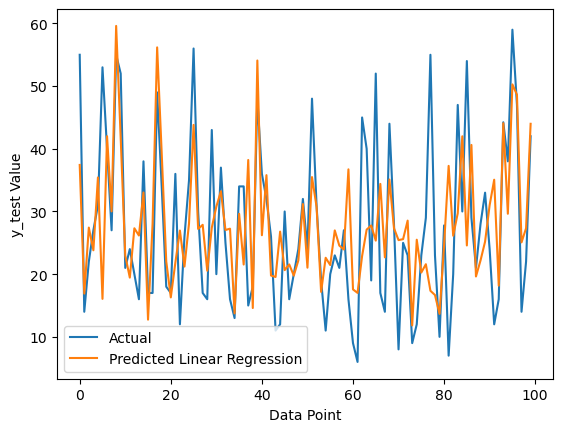

<Figure size 1200x400 with 0 Axes>

In [33]:
sns.lineplot(x=range(len(y_test[:100])), y=y_test[:100], label='Actual')
sns.lineplot(x=range(len(y_lr_pred)), y=y_lr_pred, label='Predicted Linear Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

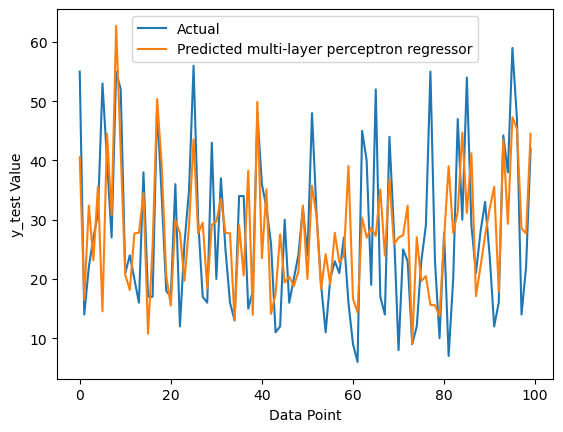

<Figure size 1200x400 with 0 Axes>

In [34]:
sns.lineplot(x=range(len(y_test[:100])), y=y_test[:100], label='Actual')
sns.lineplot(x=range(len(y_mlr_pred)), y=y_mlr_pred, label='Predicted multi-layer perceptron regressor')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

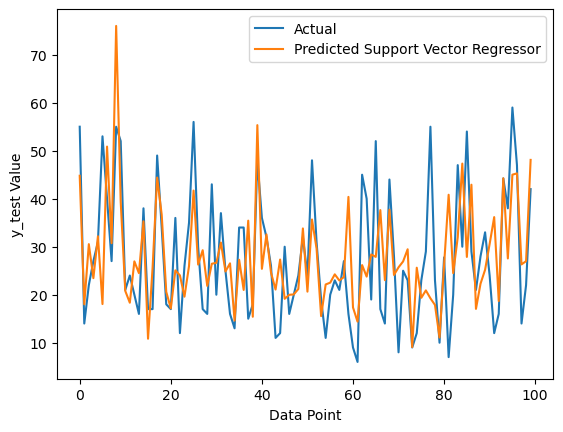

<Figure size 1200x400 with 0 Axes>

In [35]:
sns.lineplot(x=range(len(y_test[:100])), y=y_test[:100], label='Actual')
sns.lineplot(x=range(len(y_svr_pred)), y=y_svr_pred, label='Predicted Support Vector Regressor')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

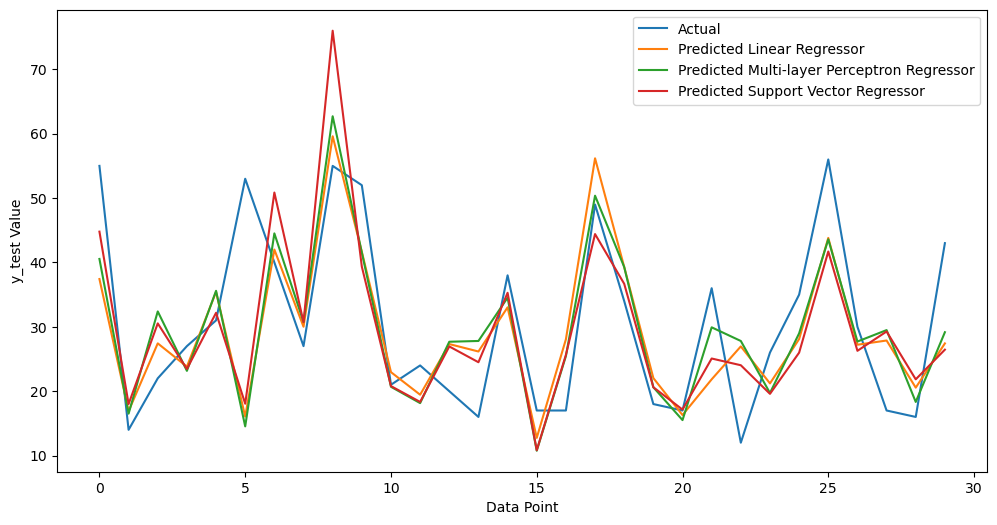

In [36]:
plt.figure(figsize=(12, 6))

# Plot actual data
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')

# Plot predicted data for Linear Regression
sns.lineplot(x=range(len(y_lr_pred[:30])), y=y_lr_pred[:30], label='Predicted Linear Regressor')

# Plot predicted data for Multi-layer Perceptron Regression
sns.lineplot(x=range(len(y_mlr_pred[:30])), y=y_mlr_pred[:30], label='Predicted Multi-layer Perceptron Regressor')

# Plot predicted data for Support Vector Regression
sns.lineplot(x=range(len(y_svr_pred[:30])), y=y_svr_pred[:30], label='Predicted Support Vector Regressor')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.legend()
plt.show()

In [37]:
data = {'model': ['LR', 'MLR', 'SVR'],
        'MAE': [lr_mae, mlr_mae, svr_mae],
        'RMSE': [lr_rmse, mlr_rmse, svr_rmse],
        'R^2': [lr_r2, mlr_r2, svr_r2]}

perfomance = pd.DataFrame(data)
perfomance

,model,MAE,RMSE,R^2
0,LR,9.023379,12.673422,0.449173
1,MLR,8.867975,12.310911,0.480234
2,SVR,8.484339,11.870941,0.516721


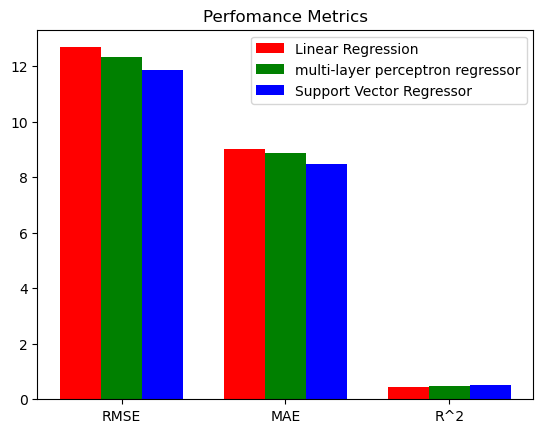

In [38]:
N = 3
ind = np.arange(N)  
width = 0.25
  
xvals = [lr_rmse, lr_mae, lr_r2] 
bar1 = plt.bar(ind, xvals, width, color = 'r') 
  
yvals = [mlr_rmse, mlr_mae, mlr_r2] 
bar2 = plt.bar(ind+width, yvals, width, color='g') 
  
zvals = [svr_rmse, svr_mae, svr_r2] 
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b') 
  
plt.title("Perfomance Metrics") 
  
plt.xticks(ind+width,['RMSE', 'MAE', 'R^2']) 
plt.legend( (bar1, bar2, bar3), ('Linear Regression', 'multi-layer perceptron regressor', 'Support Vector Regressor') ) 
plt.show() 

- ดูจากค่า MAE, RMSE, และ R^2 ที่ให้มา เราสามารถพิจารณาว่า SVR (Support Vector Regressor) มีค่า MAE และ RMSE ที่ต่ำกว่าทั้ง LR (Linear Regression) และ MLR (Multi-linear Regression) ซึ่งแสดงให้เห็นว่า SVR มีความแม่นยำในการทำนายที่ดีกว่า และมีค่า R^2 ที่สูงกว่าทั้งสองโมเดลอื่นๆ ซึ่งหมายความว่า SVR มีความสามารถในการอธิบายข้อมูลได้ดีกว่า LR และ MLR

In [41]:
# save model
pickle.dump(lr, open("model/lr_model.pickle", 'wb'))
pickle.dump(mlr, open("model/mlr_model.pickle", 'wb'))
pickle.dump(svr, open("model/svr_model.pickle", 'wb'))